In [1]:
from regFilter.filter import *
from regFilter.spectra import *

/tmp/ipykernel_600191/1982318355.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  y = feat.index.str.replace('[^0-9]', '').str.replace('^$', '0').tolist()


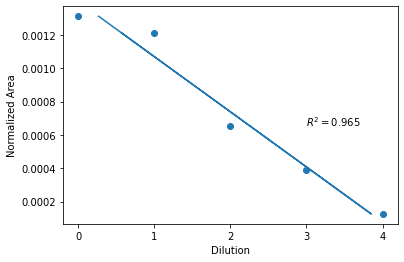

1

In [2]:
quant = '../quant_010.tsv'
idx = '211'

samp = Filter(quant)
feat = pd.read_csv(quant, sep='\t', index_col='Groups')
samp.feat_area = feat
y = feat.index.str.replace('[^0-9]', '').str.replace('^$', '0').tolist()
y = np.array([float(i) for i in y]).reshape(-1, 1)
samp.y = y
samp.filterReg(feat_idx=idx, plot=True)

In [3]:
mgffile = '../../feat_finding/ms2_010.mgf'
f = open(mgffile)
lines = np.array(f.readlines())
f.close()
lines[:20]

array(['BEGIN IONS\n', 'FEATURE_ID=9\n', 'PEPMASS=338.3399\n',
       'SCANS=9\n', 'RTINSECONDS=2907.611\n', 'CHARGE=1\n', 'MSLEVEL=2\n',
       '107.0797 1.4E2\n', '109.0981 1.9E2\n', '111.1048 1.6E2\n',
       '125.1279 1.0E2\n', '268.2561 2.4E2\n', '279.2685 1.7E2\n',
       '282.2707 3.6E2\n', '296.3129 1.3E2\n', '303.3023 2.3E3\n',
       '304.3047 4.6E2\n', '321.3135 2.5E3\n', '322.3156 6.3E2\n',
       '323.3211 2.3E2\n'], dtype='<U21')

In [10]:
np.flatnonzero(np.core.defchararray.find(lines,'SCANS')!=-1)

array([    3,    28,    38, ..., 56113, 56131, 56168])

In [9]:
mgffile

'../../feat_finding/ms2_010.mgf'

In [11]:
out = [re.sub('[^0-9]', '', i) for i, v in enumerate(lines) if 'SCANS=' in v]
out

[3,
 28,
 38,
 47,
 72,
 102,
 163,
 172,
 181,
 199,
 208,
 309,
 318,
 371,
 382,
 416,
 430,
 481,
 492,
 519,
 535,
 603,
 614,
 666,
 688,
 703,
 715,
 752,
 831,
 841,
 862,
 883,
 892,
 921,
 934,
 946,
 961,
 1007,
 1016,
 1042,
 1144,
 1185,
 1202,
 1222,
 1277,
 1290,
 1302,
 1332,
 1397,
 1406,
 1447,
 1474,
 1495,
 1508,
 1530,
 1555,
 1586,
 1596,
 1605,
 1614,
 1623,
 1632,
 1658,
 1690,
 1703,
 1723,
 1737,
 1762,
 1783,
 1840,
 1865,
 1880,
 1913,
 1922,
 1940,
 1957,
 1966,
 1986,
 2007,
 2112,
 2136,
 2152,
 2179,
 2201,
 2210,
 2227,
 2258,
 2267,
 2287,
 2307,
 2337,
 2348,
 2385,
 2404,
 2418,
 2435,
 2453,
 2473,
 2497,
 2521,
 2565,
 2617,
 2626,
 2637,
 2700,
 2716,
 2756,
 2767,
 2780,
 2789,
 2802,
 2826,
 2835,
 2885,
 2946,
 2962,
 2972,
 2994,
 3003,
 3017,
 3027,
 3036,
 3045,
 3060,
 3095,
 3115,
 3130,
 3157,
 3168,
 3185,
 3211,
 3220,
 3232,
 3252,
 3306,
 3373,
 3395,
 3404,
 3415,
 3424,
 3433,
 3442,
 3465,
 3483,
 3500,
 3620,
 3629,
 3644,
 3671,


In [12]:
lines[out]

array(['SCANS=9\n', 'SCANS=13\n', 'SCANS=14\n', ..., 'SCANS=16911\n',
       'SCANS=17268\n', 'SCANS=17657\n'], dtype='<U21')

In [14]:
import re

re.sub('[^0-9]', '', 'SCANS=9\n')

'9'

In [16]:
def getSpectraIndexes(mgffile):
    spectrum = {}
    f = open(mgffile)
    lines = np.array(f.readlines())
    f.close()
    pos = [i for i, v in enumerate(lines) if 'SCANS=' in v]
    ind = [re.sub('[^0-9]', '', x) for x in lines[pos]]
    return ind

In [17]:
getSpectraIndexes(mgffile)

['9',
 '13',
 '14',
 '15',
 '20',
 '21',
 '22',
 '25',
 '31',
 '34',
 '35',
 '36',
 '38',
 '39',
 '41',
 '42',
 '43',
 '46',
 '47',
 '49',
 '51',
 '53',
 '54',
 '57',
 '58',
 '61',
 '62',
 '63',
 '66',
 '69',
 '70',
 '71',
 '72',
 '74',
 '76',
 '77',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '89',
 '90',
 '91',
 '97',
 '100',
 '101',
 '102',
 '104',
 '106',
 '111',
 '113',
 '117',
 '118',
 '119',
 '122',
 '130',
 '131',
 '132',
 '133',
 '134',
 '136',
 '137',
 '138',
 '140',
 '144',
 '145',
 '146',
 '150',
 '151',
 '152',
 '153',
 '155',
 '156',
 '157',
 '161',
 '163',
 '164',
 '166',
 '167',
 '170',
 '172',
 '173',
 '174',
 '175',
 '177',
 '179',
 '180',
 '181',
 '183',
 '185',
 '192',
 '193',
 '195',
 '196',
 '197',
 '200',
 '203',
 '205',
 '206',
 '209',
 '211',
 '212',
 '215',
 '216',
 '219',
 '220',
 '221',
 '225',
 '228',
 '231',
 '233',
 '235',
 '237',
 '240',
 '244',
 '245',
 '247',
 '253',
 '254',
 '256',
 '257',
 '258',
 '262',
 '263',
 '264',
 '266',
 '268',
 '269',
 '282',

In [3]:
%matplotlib inline

In [4]:
!reg_filter plot \
    --quant ../quant_010.tsv \
    --idx 211

/home/rsilva/miniconda3/envs/regfilter/lib/python3.9/site-packages/regFilter-0.0.1-py3.9.egg/EGG-INFO/scripts/reg_filter:71: FutureWarning: The default value of regex will change from True to False in a future version.
  y = feat.index.str.replace('[^0-9]', '').str.replace('^$', '0').tolist()
Figure(640x480)
